## Week 1 Task - Full MNIST model

### 1. Setting up:

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
import os

In [3]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [4]:
path = untar_data(URLs.MNIST)

In [5]:
Path.BASE_PATH = path

Here just checking if paths and everything else works fine and giving the right outputs:

In [6]:
path.ls()

(#2) [Path('training'),Path('testing')]

In [7]:
(path/'testing').ls()

(#10) [Path('testing/0'),Path('testing/2'),Path('testing/9'),Path('testing/8'),Path('testing/7'),Path('testing/1'),Path('testing/5'),Path('testing/4'),Path('testing/6'),Path('testing/3')]

In [8]:
zeros = (path/'training'/'0').ls().sorted()
ones = (path/'training'/'1').ls().sorted()
twos = (path/'training'/'2').ls().sorted()
threes = (path/'training'/'3').ls().sorted()
fours = (path/'training'/'4').ls().sorted()
fives = (path/'training'/'5').ls().sorted()
sixes = (path/'training'/'6').ls().sorted()
sevens = (path/'training'/'7').ls().sorted()
eights = (path/'training'/'8').ls().sorted()
nines = (path/'training'/'7').ls().sorted()
nines, fours

((#6265) [Path('training/7/10002.png'),Path('training/7/1001.png'),Path('training/7/10014.png'),Path('training/7/10019.png'),Path('training/7/10039.png'),Path('training/7/10046.png'),Path('training/7/10050.png'),Path('training/7/10063.png'),Path('training/7/10077.png'),Path('training/7/10086.png')...],
 (#5842) [Path('training/4/10013.png'),Path('training/4/10018.png'),Path('training/4/10033.png'),Path('training/4/1004.png'),Path('training/4/1006.png'),Path('training/4/10060.png'),Path('training/4/1008.png'),Path('training/4/10103.png'),Path('training/4/10104.png'),Path('training/4/10114.png')...])

In [9]:
im6_path = sixes[78]
im6 = Image.open(im6_path)
im6

### 2. Getting data:

Using higher level ImageDataLoaders, instead of configuring DataBlock API for simplicity.

Need to specify train and valid, otherwise there'll be an error.

In [10]:
dls = ImageDataLoaders.from_folder(path, train='training', valid='testing')

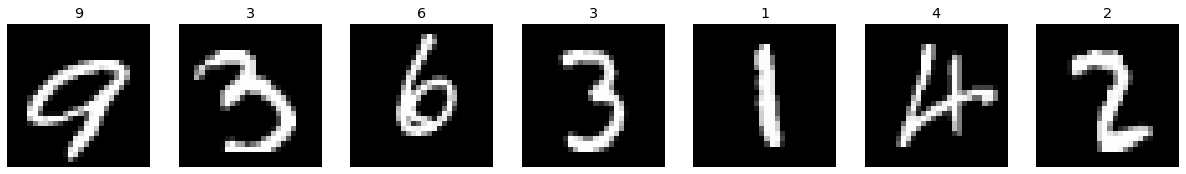

In [11]:
dls.show_batch(max_n=7, nrows=1)

### 3. Making learner and running it:

Next, we use cnn_learner as a learner and resnet18 as a neural net with 18 layers.

Using the ones made from scratch would require to make our own SGD, loss function and metrics.

Here we can use F.cross_entropy as our loss function. It uses softmax instead of sigmoid, because we have multiple categories, not just 2.

In [12]:
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=error_rate, path=Path("."))

In [13]:
learn.path

Path('.')

We haven't studied about the learning rate yet, so I tried a random few, and basically, 0.01 or 0.02 is average best we can get here.

In [13]:
learn.fit_one_cycle(7, 0.02)

epoch,train_loss,valid_loss,error_rate,time
0,0.225923,0.658638,0.105500,01:15
1,0.155843,0.114263,0.027300,01:10
2,0.105395,0.440630,0.027300,01:10
3,0.057810,0.055505,0.013400,01:09
4,0.033300,0.028258,0.007300,01:10
5,0.014430,0.021287,0.005400,01:10
6,0.010439,0.019540,0.004600,01:09


In [14]:
learn.export('first_export.pkl')

#### Adding an augmentation to it:

In [14]:
dls = ImageDataLoaders.from_folder(path, train='training', valid='testing', 
                                   item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))

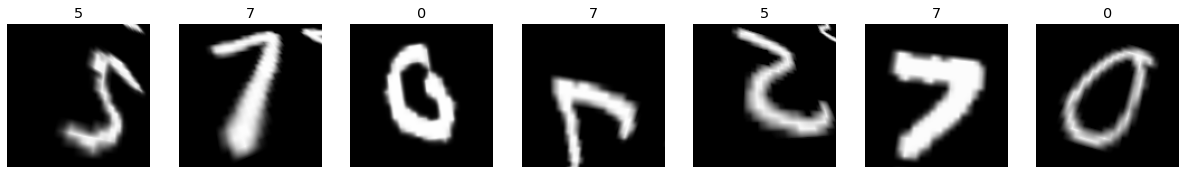

In [15]:
dls.show_batch(max_n=7, nrows=1)

In [16]:
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=error_rate)

In [17]:
learn.fit_one_cycle(5, 0.01)

epoch,train_loss,valid_loss,error_rate,time
0,0.407393,0.167778,0.051500,04:15
1,0.217282,0.070343,0.022300,04:15
2,0.125984,0.035392,0.011200,04:15
3,0.078928,0.032889,0.009400,04:15
4,0.063034,0.028212,0.009000,04:16


As we can see - augmentation didn't help at all, even worsened in a way.

## The end